In [161]:
import pandas as pd

In [163]:
df = pd.read_csv('titanic_final.csv')

In [165]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [169]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [171]:
df_copy = df.copy()

In [173]:
df_copy.drop(columns='Cabin',inplace=True)

In [175]:
df_copy.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

##### filling missing value

In [178]:
df_copy['Age'].fillna(value = df_copy['Age'].mean(),inplace=True)

C:\Users\clash\AppData\Local\Temp\ipykernel_3652\3589944413.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Age'].fillna(value = df_copy['Age'].mean(),inplace=True)


In [180]:
df_copy.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [182]:
df_copy['Embarked'] = df_copy['Embarked'].fillna(df_copy['Embarked'].mode()[0])


In [184]:
df_copy.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [186]:
y = df_copy['Survived']

In [188]:
x = df_copy.drop(columns=['PassengerId','Survived','Name','Ticket'])

In [190]:
df_copy['Sex'].unique()

array(['male', 'female'], dtype=object)

In [192]:
df_copy['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [194]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [196]:
from sklearn.preprocessing import LabelEncoder

In [198]:
label = LabelEncoder()
embarked_encoder = LabelEncoder()

In [200]:
sex = x['Sex']

In [202]:
sex.unique()

array(['male', 'female'], dtype=object)

In [204]:
emb = x['Embarked']

In [206]:
encoded_sex = label.fit_transform(sex)

In [208]:
print(label.classes_)

['female' 'male']


In [210]:
encoded_emb = embarked_encoder.fit_transform(emb)

In [212]:
print(embarked_encoder.classes_)

['C' 'Q' 'S']


In [214]:
x['Sex'] = encoded_sex
x['Embarked'] = encoded_emb

In [216]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [218]:
from sklearn.preprocessing import StandardScaler

In [220]:
scalar = StandardScaler()

In [222]:
x_scaled = scalar.fit_transform(x)

In [224]:
x_scaled

array([[ 0.82737724,  0.73769513, -0.5924806 , ..., -0.47367361,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.63878901, ..., -0.47367361,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.2846632 , ..., -0.47367361,
        -0.48885426,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ...,  2.00893337,
        -0.17626324,  0.58595414],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -0.47367361,
        -0.04438104, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -0.47367361,
        -0.49237783, -0.67817453]])

In [226]:
from sklearn.model_selection import train_test_split

In [228]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=42)

In [230]:
from sklearn.linear_model import LogisticRegression

In [232]:
model = LogisticRegression()

In [234]:
model.fit(X_train,y_train)

LogisticRegression()

In [236]:
pred = model.predict(X_test)

In [238]:
pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

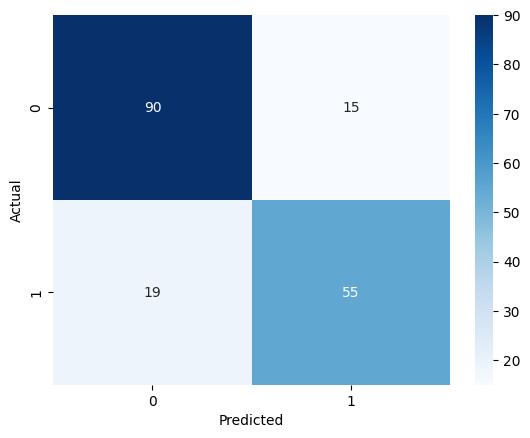

In [240]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [241]:
cm

array([[90, 15],
       [19, 55]], dtype=int64)

In [244]:
from sklearn.metrics import accuracy_score, classification_report 

print("Accuracy:", accuracy_score(y_test, pred))



Accuracy: 0.8100558659217877


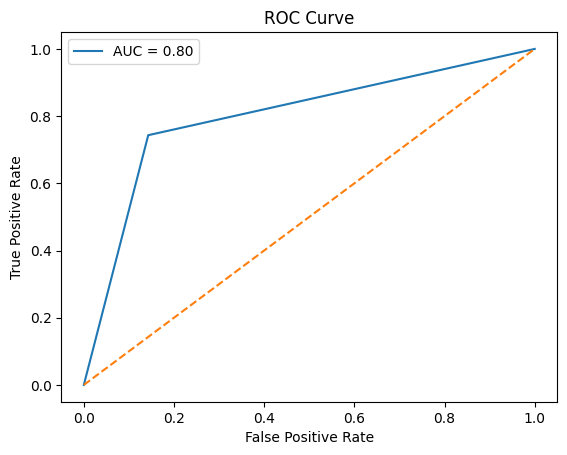

In [246]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, pred)
auc_score = roc_auc_score(y_test, pred)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [248]:
roc_auc_score(y_test, pred)

0.8001930501930502

In [252]:
from sklearn.metrics import precision_score

In [254]:
precision_score(y_test, pred)

0.7857142857142857

In [256]:
import joblib as joblib

In [258]:
joblib.dump(model,'model.pkl')

['model.pkl']

In [260]:
joblib.dump(scalar,'scalar.pkl')

['scalar.pkl']

In [262]:
joblib.dump(label,'label.pkl')

['label.pkl']

In [266]:
joblib.dump(embarked_encoder,'emparked.pkl')

['emparked.pkl']

In [268]:
proba = model.predict_proba(X_test)
proba

array([[0.89509424, 0.10490576],
       [0.78087403, 0.21912597],
       [0.86803534, 0.13196466],
       [0.10668875, 0.89331125],
       [0.23953829, 0.76046171],
       [0.06353832, 0.93646168],
       [0.3248571 , 0.6751429 ],
       [0.9116336 , 0.0883664 ],
       [0.2390303 , 0.7609697 ],
       [0.07412935, 0.92587065],
       [0.66932213, 0.33067787],
       [0.93280114, 0.06719886],
       [0.6173618 , 0.3826382 ],
       [0.85129243, 0.14870757],
       [0.80540019, 0.19459981],
       [0.05850799, 0.94149201],
       [0.70309723, 0.29690277],
       [0.32481523, 0.67518477],
       [0.75771948, 0.24228052],
       [0.67253007, 0.32746993],
       [0.88166492, 0.11833508],
       [0.59298149, 0.40701851],
       [0.36831033, 0.63168967],
       [0.86767592, 0.13232408],
       [0.89750352, 0.10249648],
       [0.93579146, 0.06420854],
       [0.52706028, 0.47293972],
       [0.77984102, 0.22015898],
       [0.92361238, 0.07638762],
       [0.38572149, 0.61427851],
       [0.

In [270]:
cm = confusion_matrix(y_test, pred)

In [272]:
cm

array([[90, 15],
       [19, 55]], dtype=int64)

In [274]:
print(label.classes_)

['female' 'male']
